In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Variational Logistic Regression

We now illustrate the use of local variational methods by returning to the Bayesian logistic regression model studied in Section 4.5. There we focused on the use of the Laplace approximation, while here we consider a variational treatment based on the approach of Jaakkola and Jordan (2000). Like the Laplace method, this also leads to a Gaussian approximation to the posterior distribution. However, the greater flexibility of the variational approximation leads to improved accuracy compared to the Laplace method. Furthermore, unlike the Laplace method, the variational approach optimizes a well-defined objective function given by a rigorous bound on the model evidence.

Logistic regression has also been treated by Dybowski and Roberts (2005) from a Bayesian perspective using Monte Carlo sampling techniques.

##  Variational Posterior Distribution

In the variational framework, we seek to maximize a lower bound on the marginal likelihood. For the Bayesian logistic regression model, the marginal likelihood takes the form:

$$
p(t) = \int p(t|w)p(w) \, dw = \prod_{n=1}^N p(t_n | w) p(w) \, dw
$$

The conditional distribution for $ t $ can be written as:

$$
p(t|w) = \sigma(a)^t (1 - \sigma(a))^{1 - t} = \frac{e^{at}}{1 + e^a}
$$

where $ a = w^T \phi $.

### Lower Bound on Logistic Sigmoid

To obtain a lower bound on $ p(t) $, we make use of the variational lower bound on the logistic sigmoid function, given by:

$$
\sigma(z) \approx \sigma(\xi) \exp \left( \frac{z - \xi}{2} - \lambda(\xi) (z^2 - \xi^2) \right)
$$

where \( \lambda(\xi) \) is given by:

$$
\lambda(\xi) = \frac{1}{2\xi^2} \left( \sigma(\xi) - \frac{1}{2} \right)
$$

Therefore, we can write:

$$
p(t|w) = \frac{e^{at} \sigma(-a)}{\sigma(\xi)} \exp \left( - \frac{a + \xi}{2} - \lambda(\xi)(a^2 - \xi^2) \right)
$$

### Variational Posterior Distribution

Applying the variational approximation to each term in the likelihood function, we obtain the following bound on the joint distribution of $ t $ and $ w $:

$$
p(t, w) = p(t|w) p(w) \approx h(w, \xi) p(w)
$$

where:

$$
h(w, \xi) = \prod_{n=1}^N \left( \sigma(\xi_n) \exp \left( w^T \phi_n t_n - \frac{w^T \phi_n + \xi_n}{2} - \lambda(\xi_n) \left( [w^T \phi_n]^2 - \xi_n^2 \right) \right) \right)
$$

### Logarithm of Joint Distribution

The logarithm of the joint distribution provides a lower bound:

$$
\ln \left( p(t|w)p(w) \right) \geq \ln p(w) + \sum_{n=1}^N \ln \sigma(\xi_n) + w^T \phi_n (t_n - \frac{1}{2}) - \frac{w^T \phi_n + \xi_n}{2} - \lambda(\xi_n) \left( [w^T \phi_n]^2 - \xi_n^2 \right)
$$

Substituting for the prior $ p(w) $, the right-hand side becomes:

$$
- \frac{1}{2} (w - m_0)^T S_0^{-1} (w - m_0) + \sum_{n=1}^N \left( w^T \phi_n (t_n - \frac{1}{2}) - \lambda(\xi_n) w^T (\phi_n \phi_n^T) w \right) + \text{const.}
$$

### Gaussian Approximation

This is a quadratic function of $ w $, and thus we can obtain the corresponding variational approximation to the posterior distribution. The variational posterior distribution is Gaussian:

$$
q(w) = \mathcal{N}(w | m_N, S_N)
$$

where the mean and covariance are:

$$
m_N = S_N \left( S_0^{-1} m_0 + \sum_{n=1}^N (t_n - \frac{1}{2}) \phi_n \right)
$$

$$
S_N^{-1} = S_0^{-1} + 2 \sum_{n=1}^N \lambda(\xi_n) \phi_n \phi_n^T
$$

### Conclusion

As with the Laplace framework, we have obtained a Gaussian approximation to the posterior distribution. However, the additional flexibility provided by the variational parameters $ \xi_n $ leads to improved accuracy in the approximation, as shown by Jaakkola and Jordan (2000). This framework can also be extended to sequential learning and to more complex models, including those with multiple classes.


## Variational Logistic Regression

We now illustrate the use of local variational methods by returning to the Bayesian logistic regression model studied in Section 4.5. There we focused on the use of the Laplace approximation, while here we consider a variational treatment based on the approach of Jaakkola and Jordan (2000). Like the Laplace method, this also leads to a Gaussian approximation to the posterior distribution. However, the greater flexibility of the variational approximation leads to improved accuracy compared to the Laplace method. Furthermore, unlike the Laplace method, the variational approach optimizes a well-defined objective function given by a rigorous bound on the model evidence.

Logistic regression has also been treated by Dybowski and Roberts (2005) from a Bayesian perspective using Monte Carlo sampling techniques.

## Variational Posterior Distribution

In the variational framework, we seek to maximize a lower bound on the marginal likelihood. For the Bayesian logistic regression model, the marginal likelihood takes the form:

$$
p(t) = \int p(t|w)p(w) \, dw = \prod_{n=1}^N p(t_n | w) p(w) \, dw
$$

The conditional distribution for $ t $ can be written as:

$$
p(t|w) = \sigma(a)^t (1 - \sigma(a))^{1 - t} = \frac{e^{at}}{1 + e^a}
$$

where $ a = w^T \phi $.

### Lower Bound on Logistic Sigmoid

To obtain a lower bound on $ p(t) $, we make use of the variational lower bound on the logistic sigmoid function, given by:

$$
\sigma(z) \approx \sigma(\xi) \exp \left( \frac{z - \xi}{2} - \lambda(\xi) (z^2 - \xi^2) \right)
$$

where \( \lambda(\xi) \) is given by:

$$
\lambda(\xi) = \frac{1}{2\xi^2} \left( \sigma(\xi) - \frac{1}{2} \right)
$$

Therefore, we can write:

$$
p(t|w) = \frac{e^{at} \sigma(-a)}{\sigma(\xi)} \exp \left( - \frac{a + \xi}{2} - \lambda(\xi)(a^2 - \xi^2) \right)
$$

### Variational Posterior Distribution

Applying the variational approximation to each term in the likelihood function, we obtain the following bound on the joint distribution of $ t $ and $ w $:

$$
p(t, w) = p(t|w) p(w) \approx h(w, \xi) p(w)
$$

where:

$$
h(w, \xi) = \prod_{n=1}^N \left( \sigma(\xi_n) \exp \left( w^T \phi_n t_n - \frac{w^T \phi_n + \xi_n}{2} - \lambda(\xi_n) \left( [w^T \phi_n]^2 - \xi_n^2 \right) \right) \right)
$$

### Logarithm of Joint Distribution

The logarithm of the joint distribution provides a lower bound:

$$
\ln \left( p(t|w)p(w) \right) \geq \ln p(w) + \sum_{n=1}^N \ln \sigma(\xi_n) + w^T \phi_n (t_n - \frac{1}{2}) - \frac{w^T \phi_n + \xi_n}{2} - \lambda(\xi_n) \left( [w^T \phi_n]^2 - \xi_n^2 \right)
$$

Substituting for the prior $ p(w) $, the right-hand side becomes:

$$
- \frac{1}{2} (w - m_0)^T S_0^{-1} (w - m_0) + \sum_{n=1}^N \left( w^T \phi_n (t_n - \frac{1}{2}) - \lambda(\xi_n) w^T (\phi_n \phi_n^T) w \right) + \text{const.}
$$

### Gaussian Approximation

This is a quadratic function of $ w $, and thus we can obtain the corresponding variational approximation to the posterior distribution. The variational posterior distribution is Gaussian:

$$
q(w) = \mathcal{N}(w | m_N, S_N)
$$

where the mean and covariance are:

$$
m_N = S_N \left( S_0^{-1} m_0 + \sum_{n=1}^N (t_n - \frac{1}{2}) \phi_n \right)
$$

$$
S_N^{-1} = S_0^{-1} + 2 \sum_{n=1}^N \lambda(\xi_n) \phi_n \phi_n^T
$$

### Conclusion

As with the Laplace framework, we have obtained a Gaussian approximation to the posterior distribution. However, the additional flexibility provided by the variational parameters $ \xi_n $ leads to improved accuracy in the approximation, as shown by Jaakkola and Jordan (2000). This framework can also be extended to sequential learning and to more complex models, including those with multiple classes.


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log


Optimized weights: [ 0.62037948 -0.79701274]


ValueError: 'black' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

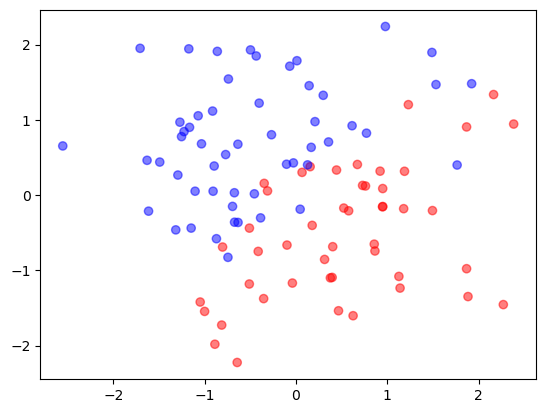

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Sigmoid function
from scipy.optimize import minimize

# Logistic sigmoid function
def sigmoid(x):
    return expit(x)

# Variational bound on the logistic sigmoid
def variational_bound(z, xi):
    lambda_xi = (sigmoid(xi) - 0.5) / (2 * xi**2)
    return sigmoid(xi) * np.exp((z - xi) / 2 - lambda_xi * (z**2 - xi**2))

# Log likelihood function for the variational bound
def log_likelihood(w, X, t, xi):
    a = X.dot(w)
    bound = variational_bound(a, xi)
    return np.sum(t * np.log(bound) + (1 - t) * np.log(1 - bound))

# Log posterior function (including prior)
def log_posterior(w, X, t, m0, S0, xi):
    # Variational lower bound to the likelihood
    likelihood = log_likelihood(w, X, t, xi)
    # Prior term (Gaussian)
    prior = -0.5 * np.dot(w - m0, np.dot(S0, w - m0))
    return likelihood + prior

# Derivative of the log posterior (gradient)
def grad_log_posterior(w, X, t, m0, S0, xi):
    a = X.dot(w)
    p = sigmoid(a)
    grad_likelihood = X.T.dot(t - p)
    grad_prior = -np.dot(S0, (w - m0))
    return grad_likelihood + grad_prior

# Optimizing the variational posterior
def optimize_variational_posterior(X, t, m0, S0, xi_init):
    # Initial guess for w
    w_init = np.zeros(X.shape[1])
    
    # Minimize negative log posterior (maximize log posterior)
    result = minimize(lambda w: -log_posterior(w, X, t, m0, S0, xi_init), 
                      w_init, jac=lambda w: -grad_log_posterior(w, X, t, m0, S0, xi_init), 
                      method='BFGS')
    
    return result.x  # Return optimized weights

# Generate synthetic data for logistic regression
np.random.seed(0)
N = 100  # Number of data points
D = 2    # Number of features

# Generate random features
X = np.random.randn(N, D)

# True weights and generating labels
true_w = np.array([2, -3])
t = np.random.binomial(1, sigmoid(X.dot(true_w)))

# Prior parameters for Gaussian prior
m0 = np.zeros(D)
S0 = np.eye(D)

# Initial variational parameters (xi) for each data point
xi_init = np.ones(N) * 2.0

# Optimize the variational posterior
optimized_w = optimize_variational_posterior(X, t, m0, S0, xi_init)

print(f"Optimized weights: {optimized_w}")

# Visualize the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=t, cmap='bwr', alpha=0.5)
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = sigmoid(np.c_[xx.ravel(), yy.ravel()].dot(optimized_w)).reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], cmap='black')
plt.title("Logistic Regression with Variational Approximation")
plt.show()


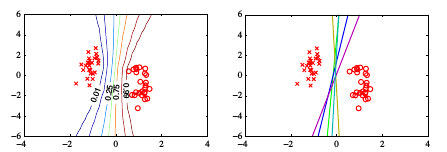

Fig.13 Illustration of the Bayesian approach to logistic regression for a simple linearly separable data set. The plot on the left shows the predictive distribution obtained using variational inference. We see that the decision boundary lies roughly mid way between the clusters of data points, and that the contours of the predictive distribution splay out away from the data reﬂecting the greater uncertainty in the classiﬁcation of such regions. The plot on the right shows the decision boundaries corresponding to ﬁve samples of the parameter vector w drawn from the posterior distribution p(w|t).



In [ ]:
import numpy as np
from scipy.special import expit
from scipy.linalg import inv
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return expit(x)

# Compute the re-estimation of xi using the posterior
def update_xi(S_N, m_N, X, t):
    N = X.shape[0]
    xi_new = np.zeros(N)
    
    for n in range(N):
        phi_n = X[n, :]
        xi_new[n] = np.sqrt(np.dot(phi_n.T, np.dot(S_N + np.outer(m_N, m_N), phi_n)))
    
    return xi_new

# Compute the posterior mean and covariance (E-step)
def compute_posterior(X, t, m0, S0, xi):
    N, D = X.shape
    lambda_xi = (sigmoid(xi) - 0.5) / (2 * xi**2)
    
    # Compute the updated covariance S_N and mean m_N
    S_N_inv = inv(S0) + np.sum(lambda_xi[:, None] * np.array([np.outer(X[n], X[n]) for n in range(N)]), axis=0)
    S_N = inv(S_N_inv)
    m_N = np.dot(S_N, np.sum(lambda_xi[:, None] * (t - 0.5) * X, axis=0)) + np.dot(S_N, np.dot(np.linalg.inv(S0), m0))
    
    return m_N, S_N

# EM Algorithm to update the variational parameters xi
def em_algorithm(X, t, m0, S0, xi_init, max_iter=10):
    xi_old = xi_init
    for iteration in range(max_iter):
        # E-step: Compute the posterior mean and covariance
        m_N, S_N = compute_posterior(X, t, m0, S0, xi_old)
        
        # M-step: Update the variational parameters xi
        xi_new = update_xi(S_N, m_N, X, t)
        
        # Check for convergence
        if np.allclose(xi_new, xi_old):
            break
        xi_old = xi_new
    
    return m_N, S_N, xi_new

# Generate synthetic data for logistic regression
np.random.seed(0)
N = 100  # Number of data points
D = 2    # Number of features
X = np.random.randn(N, D)
true_w = np.array([2, -3])
t = np.random.binomial(1, sigmoid(X.dot(true_w)))

# Prior parameters for Gaussian prior
m0 = np.zeros(D)
S0 = np.eye(D)

# Initial variational parameters (xi) for each data point
xi_init = np.ones(N) * 2.0

# Run the EM algorithm to optimize the variational parameters
m_N, S_N, xi_optimized = em_algorithm(X, t, m0, S0, xi_init)

print(f"Optimized variational parameters (xi): {xi_optimized}")

# Visualize the decision boundary (for simplicity, using the final posterior mean)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap='bwr', alpha=0.5)
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = sigmoid(np.c_[xx.ravel(), yy.ravel()].dot(m_N)).reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], cmap='black')
plt.title("Logistic Regression with Optimized Variational Parameters")
plt.show()


## Inference of Hyperparameters

So far, we have treated the hyperparameter $\alpha$ in the prior distribution as a known constant. We now extend the Bayesian logistic regression model to allow the value of this parameter to be inferred from the data set. This can be achieved by combining the global and local variational approximations into a single framework, so as to maintain a lower bound on the marginal likelihood at each stage. Such a combined approach was adopted by Bishop and Svensén (2003) in the context of a Bayesian treatment of the hierarchical mixture of experts model. Specifically, we consider once again a simple isotropic Gaussian prior distribution of the form

$$
p(w|\alpha) = \mathcal{N}(w|0, \alpha^{-1} I) \tag{10.165}
$$

Our analysis is readily extended to more general Gaussian priors, for instance, if we wish to associate a different hyperparameter with different subsets of the parameters $w_j$. As usual, we consider a conjugate hyperprior over $\alpha$ given by a gamma distribution:

$$
p(\alpha) = \text{Gam}(\alpha|a_0 , b_0) \tag{10.166}
$$

governed by the constants $a_0$ and $b_0$. The marginal likelihood for this model now takes the form:

$$
p(t) = \int \int p(w, \alpha, t) \, dw \, d\alpha \tag{10.167}
$$

where the joint distribution is given by:

$$
p(w, \alpha, t) = p(t|w) p(w|\alpha) p(\alpha). \tag{10.168}
$$

We are now faced with an analytically intractable integration over $w$ and $\alpha$, which we shall tackle by using both the local and global variational approaches in the same model. To begin with, we introduce a variational distribution $q(w, \alpha)$, and then apply the decomposition:

$$
\ln p(t) = L(q) + \text{KL}(q \| p) \tag{10.169}
$$

where the lower bound $L(q)$ and the Kullback-Leibler divergence $\text{KL}(q \| p)$ are defined by:

$$
L(q) = \int \int q(w, \alpha) \ln p(w, \alpha, t) \, dw \, d\alpha \tag{10.170}
$$

$$
\text{KL}(q \| p) = - \int \int q(w, \alpha) \ln \left( \frac{q(w, \alpha)}{p(w, \alpha)} \right) \, dw \, d\alpha. \tag{10.171}
$$

At this point, the lower bound $L(q)$ is still intractable due to the form of the likelihood factor $p(t|w)$. We therefore apply the local variational bound to each of the logistic sigmoid factors as before. This allows us to use the inequality (10.152) and place a lower bound on $L(q)$, which will therefore also be a lower bound on the log marginal likelihood:

$$
\ln p(t) \geq L(q) \geq L(q, \xi) \tag{10.172}
$$

Next, we assume that the variational distribution factorizes between parameters and hyperparameters, so that:

$$
q(w, \alpha) = q(w) q(\alpha). \tag{10.173}
$$

With this factorization, we can appeal to the general result (10.9) to find expressions for the optimal factors. Consider first the distribution $q(w)$. Discarding terms that are independent of $w$, we have:

$$
\ln q(w) = \mathbb{E}_\alpha \left[\ln \left\{ h(w, \xi)p(w|\alpha)p(\alpha) \right\} \right] + \text{const}
$$

Substituting for $\ln h(w, \xi)$ using (10.153), and for \(\ln p(w|\alpha)\) using (10.165), we obtain:

$$
\ln q(w) = -\frac{1}{2} w^T w + \sum_{n=1}^{N} (t_n - \frac{1}{2}) w^T \phi_n - \sum_{n=1}^{N} \lambda(\xi_n) w^T \phi_n \phi_n^T w + \text{const}.
$$

This is a quadratic function of $w$, and so the solution for $q(w)$ will be Gaussian. Completing the square in the usual way, we obtain:

$$
q(w) = \mathcal{N}(w | \mu_N, \Sigma_N) \tag{10.174}
$$

where we have defined:

$$
\Sigma_N^{-1} = \sum_{n=1}^{N} \lambda(\xi_n) \phi_n \phi_n^T + \mathbb{E}[\alpha] I, \tag{10.176}
$$

$$
\mu_N = \sum_{n=1}^{N} (t_n - \frac{1}{2}) \phi_n \tag{10.175}
$$

Similarly, the optimal solution for the factor $q(\alpha)$ is obtained from:

$$
\ln q(\alpha) = \mathbb{E}_w \left[\ln p(w|\alpha)\right] + \ln p(\alpha) + \text{const}.
$$

Substituting for $\ln p(w|\alpha)$ using (10.165), and for $\ln p(\alpha)$ using (10.166), we obtain:

$$
\ln q(\alpha) = \ln \alpha - \frac{1}{2} \mathbb{E}[w^T w] + (a_0 - 1) \ln \alpha - b_0 \alpha + \text{const}.
$$

We recognize this as the log of a gamma distribution, and so we obtain:

$$
q(\alpha) = \text{Gam}(\alpha | a_N, b_N) = \frac{b_0^{a_0}}{\Gamma(a_0)} \alpha^{a_0 - 1} e^{-b_0 \alpha}. \tag{10.177}
$$

where the parameters \(a_N\) and \(b_N\) are given by:

$$
a_N = a_0 + \frac{M}{2}, \tag{10.178}
$$

$$
b_N = b_0 + \frac{1}{2} \mathbb{E}[w^T w]. \tag{10.179}
$$

We also need to optimize the variational parameters $\xi_n$, and this is also done by maximizing the lower bound $L(q, \xi)$. Omitting terms that are independent of $\xi$, and integrating over $\alpha$, we have:

$$
L(q, \xi) = \int q(w) \ln h(w, \xi) \, dw + \text{const}.
$$

Note that this has precisely the same form as (10.159), and so we can again appeal to our earlier result (10.163), which leads to re-estimation equations of the form:

$$
(\xi_n^{\text{new}})^2 = \phi_n^T \Sigma_N + \mu_N \mu_N^T \phi_n. \tag{10.181}
$$

Finally, the required moments are given by:

$$
\mathbb{E}[\alpha] = a_N, \tag{10.182}
$$

$$
\mathbb{E}[w^T w] = \Sigma_N + \mu_N^T \mu_N. \tag{10.183}
$$


# 10.6.3 Inference of Hyperparameters

So far, we have treated the hyperparameter \(\alpha\) in the prior distribution as a known constant. We now extend the Bayesian logistic regression model to allow the value of this parameter to be inferred from the data set. This can be achieved by combining the global and local variational approximations into a single framework, so as to maintain a lower bound on the marginal likelihood at each stage. Such a combined approach was adopted by Bishop and Svensén (2003) in the context of a Bayesian treatment of the hierarchical mixture of experts model. Specifically, we consider once again a simple isotropic Gaussian prior distribution of the form

$$
p(w|\alpha) = \mathcal{N}(w|0, \alpha^{-1} I) \tag{10.165}
$$

Our analysis is readily extended to more general Gaussian priors, for instance, if we wish to associate a different hyperparameter with different subsets of the parameters \(w_j\). As usual, we consider a conjugate hyperprior over \(\alpha\) given by a gamma distribution:

$$
p(\alpha) = \text{Gam}(\alpha|a_0 , b_0) \tag{10.166}
$$

governed by the constants \(a_0\) and \(b_0\). The marginal likelihood for this model now takes the form:

$$
p(t) = \int \int p(w, \alpha, t) \, dw \, d\alpha \tag{10.167}
$$

where the joint distribution is given by:

$$
p(w, \alpha, t) = p(t|w) p(w|\alpha) p(\alpha). \tag{10.168}
$$

We are now faced with an analytically intractable integration over \(w\) and \(\alpha\), which we shall tackle by using both the local and global variational approaches in the same model. To begin with, we introduce a variational distribution \(q(w, \alpha)\), and then apply the decomposition:

$$
\ln p(t) = L(q) + \text{KL}(q \| p) \tag{10.169}
$$

where the lower bound \(L(q)\) and the Kullback-Leibler divergence \(\text{KL}(q \| p)\) are defined by:

$$
L(q) = \int \int q(w, \alpha) \ln p(w, \alpha, t) \, dw \, d\alpha \tag{10.170}
$$

$$
\text{KL}(q \| p) = - \int \int q(w, \alpha) \ln \left( \frac{q(w, \alpha)}{p(w, \alpha)} \right) \, dw \, d\alpha. \tag{10.171}
$$

At this point, the lower bound \(L(q)\) is still intractable due to the form of the likelihood factor \(p(t|w)\). We therefore apply the local variational bound to each of the logistic sigmoid factors as before. This allows us to use the inequality (10.152) and place a lower bound on \(L(q)\), which will therefore also be a lower bound on the log marginal likelihood:

$$
\ln p(t) \geq L(q) \geq L(q, \xi) \tag{10.172}
$$

Next, we assume that the variational distribution factorizes between parameters and hyperparameters, so that:

$$
q(w, \alpha) = q(w) q(\alpha). \tag{10.173}
$$

With this factorization, we can appeal to the general result (10.9) to find expressions for the optimal factors. Consider first the distribution \(q(w)\). Discarding terms that are independent of \(w\), we have:

$$
\ln q(w) = \mathbb{E}_\alpha \left[\ln \left\{ h(w, \xi)p(w|\alpha)p(\alpha) \right\} \right] + \text{const}
$$

Substituting for \(\ln h(w, \xi)\) using (10.153), and for \(\ln p(w|\alpha)\) using (10.165), we obtain:

$$
\ln q(w) = -\frac{1}{2} w^T w + \sum_{n=1}^{N} (t_n - \frac{1}{2}) w^T \phi_n - \sum_{n=1}^{N} \lambda(\xi_n) w^T \phi_n \phi_n^T w + \text{const}.
$$

This is a quadratic function of \(w\), and so the solution for \(q(w)\) will be Gaussian. Completing the square in the usual way, we obtain:

$$
q(w) = \mathcal{N}(w | \mu_N, \Sigma_N) \tag{10.174}
$$

where we have defined:

$$
\Sigma_N^{-1} = \sum_{n=1}^{N} \lambda(\xi_n) \phi_n \phi_n^T + \mathbb{E}[\alpha] I, \tag{10.176}
$$

$$
\mu_N = \sum_{n=1}^{N} (t_n - \frac{1}{2}) \phi_n \tag{10.175}
$$

Similarly, the optimal solution for the factor \(q(\alpha)\) is obtained from:

$$
\ln q(\alpha) = \mathbb{E}_w \left[\ln p(w|\alpha)\right] + \ln p(\alpha) + \text{const}.
$$

Substituting for \(\ln p(w|\alpha)\) using (10.165), and for \(\ln p(\alpha)\) using (10.166), we obtain:

$$
\ln q(\alpha) = \ln \alpha - \frac{1}{2} \mathbb{E}[w^T w] + (a_0 - 1) \ln \alpha - b_0 \alpha + \text{const}.
$$

We recognize this as the log of a gamma distribution, and so we obtain:

$$
q(\alpha) = \text{Gam}(\alpha | a_N, b_N) = \frac{b_0^{a_0}}{\Gamma(a_0)} \alpha^{a_0 - 1} e^{-b_0 \alpha}. \tag{10.177}
$$

where the parameters \(a_N\) and \(b_N\) are given by:

$$
a_N = a_0 + \frac{M}{2}, \tag{10.178}
$$

$$
b_N = b_0 + \frac{1}{2} \mathbb{E}[w^T w]. \tag{10.179}
$$

We also need to optimize the variational parameters \(\xi_n\), and this is also done by maximizing the lower bound \(L(q, \xi)\). Omitting terms that are independent of \(\xi\), and integrating over \(\alpha\), we have:

$$
L(q, \xi) = \int q(w) \ln h(w, \xi) \, dw + \text{const}.
$$

Note that this has precisely the same form as (10.159), and so we can again appeal to our earlier result (10.163), which leads to re-estimation equations of the form:

$$
(\xi_n^{\text{new}})^2 = \phi_n^T \Sigma_N + \mu_N \mu_N^T \phi_n. \tag{10.181}
$$

Finally, the required moments are given by:

$$
\mathbb{E}[\alpha] = a_N, \tag{10.182}
$$

$$
\mathbb{E}[w^T w] = \Sigma_N + \mu_N^T \mu_N. \tag{10.183}
$$


In [ ]:
import numpy as np
from scipy.stats import gamma
from numpy.linalg import inv

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the logistic regression model
def logistic_model(X, w):
    return sigmoid(np.dot(X, w))

# Define the function to compute q(w)
def compute_q_w(X, t, phi, xi, alpha_mean, lambda_xi):
    # Compute the covariance and mean for q(w)
    N = len(t)
    Sigma_inv = np.sum(lambda_xi[:, None] * np.array([np.outer(phi[n], phi[n]) for n in range(N)]), axis=0) + alpha_mean * np.eye(X.shape[1])
    Sigma_N = inv(Sigma_inv)
    
    mu_N = np.dot(Sigma_N, np.sum(lambda_xi[:, None] * (t - 0.5) * phi, axis=0))
    
    return mu_N, Sigma_N

# Define the function to compute q(alpha)
def compute_q_alpha(w, a0, b0):
    M = len(w)
    alpha_post_mean = a0 + M / 2
    alpha_post_scale = b0 + 0.5 * np.sum(np.dot(w.T, w))
    
    return alpha_post_mean, alpha_post_scale

# Update the variational parameters xi
def update_xi(X, t, mu_N, Sigma_N, lambda_xi):
    N = len(t)
    for n in range(N):
        xi_new = (np.dot(X[n].T, np.dot(Sigma_N, X[n])) - 2 * (t[n] - 0.5) * np.dot(X[n].T, mu_N)) + np.dot(mu_N.T, np.dot(Sigma_N, mu_N))
        lambda_xi[n] = xi_new
    return lambda_xi

# Define the EM algorithm for inference
def em_algorithm(X, t, m0, S0, xi_init, a0, b0, max_iter=100):
    N, D = X.shape
    xi = xi_init
    lambda_xi = xi_init
    alpha_mean = a0
    alpha_scale = b0
    phi = X  # Assuming phi is equal to X for this simple case

    for iteration in range(max_iter):
        # E-step: Update q(w) and q(alpha)
        mu_N, Sigma_N = compute_q_w(X, t, phi, lambda_xi, alpha_mean, lambda_xi)
        alpha_mean, alpha_scale = compute_q_alpha(mu_N, a0, b0)
        
        # M-step: Update xi
        lambda_xi = update_xi(X, t, mu_N, Sigma_N, lambda_xi)

        # Monitor convergence (optional)
        if iteration % 10 == 0:
            print(f"Iteration {iteration} | xi: {lambda_xi[:5]} ...")
    
    return mu_N, Sigma_N, lambda_xi, alpha_mean, alpha_scale

# Example data initialization
N = 100  # Number of data points
D = 2    # Number of features

# Random data for X and t (for demonstration purposes)
X = np.random.randn(N, D)
t = np.random.randint(0, 2, size=N)  # Binary target variable

# Hyperparameters for the Gamma prior on alpha
a0 = 1.0
b0 = 1.0

# Initialize the variational parameters
m0 = np.zeros(D)
S0 = np.eye(D)
xi_init = np.ones(N)

# Run the EM algorithm to optimize the variational parameters
mu_N, Sigma_N, lambda_xi, alpha_mean, alpha_scale = em_algorithm(X, t, m0, S0, xi_init, a0, b0)

# Output optimized variational parameters (xi) and the hyperparameter alpha
print(f"Optimized variational parameters (xi): {lambda_xi[:5]} ...")
print(f"Posterior mean of alpha: {alpha_mean}")
print(f"Posterior scale of alpha: {alpha_scale}")


##  Expectation Propagation

Expectation propagation (EP) is an alternative method for deterministic approximate inference. It is based on minimizing the Kullback-Leibler (KL) divergence, but in the reverse form compared to the variational methods discussed earlier. This results in a different set of properties and advantages. Here we discuss the main ideas behind EP.

### Minimization of KL Divergence

We are interested in minimizing the KL divergence of the form $ KL(p \parallel q) $, where $ p(z) $ is a fixed distribution and $ q(z) $ is a member of the exponential family. In this case, $ q(z) $ can be written as:

$$
q(z) = h(z) g(\eta) \exp\left(\eta^T u(z)\right),
$$

where $ \eta $ are the natural parameters of the exponential family distribution, and $ u(z) $ is the sufficient statistic for the distribution.

The KL divergence between the true distribution $ p(z) $ and the approximate distribution $ q(z) $ is given by:

$$
KL(p \parallel q) = - \ln g(\eta) - \eta^T \mathbb{E}_p[u(z)] + \text{const}.
$$

To minimize the KL divergence with respect to $ \eta $, we take the gradient of this expression and set it to zero:

$$
-\nabla \ln g(\eta) = \mathbb{E}_p[u(z)].
$$

Using the fact that the negative gradient of $ \ln g(\eta) $ is equal to the expectation of $ u(z) $ under the distribution $ q(z) $, we equate both sides and obtain the condition:

$$
\mathbb{E}_q[u(z)] = \mathbb{E}_p[u(z)].
$$

This condition implies that the optimal solution occurs when the expected sufficient statistics of $ q(z) $ match those of $ p(z) $, which is known as *moment matching*.

### Posterior Approximation

Now, consider a probabilistic model where the joint distribution of data $ D $ and hidden variables $ \theta $ is given by:

$$
p(D, \theta) = \prod_i f_i(\theta).
$$

For example, in a model with independent and identically distributed (i.i.d.) data, each factor $ f_n(\theta) $ represents the likelihood of a data point $ x_n $, and $ f_0(\theta) $ represents the prior over $ \theta $. In such cases, the posterior distribution $ p(\theta|D) $ is given by:

$$
p(\theta|D) = \frac{1}{p(D)} \prod_i f_i(\theta),
$$

and the model evidence $ p(D) $ is:

$$
p(D) = \int \prod_i f_i(\theta) \, d\theta.
$$

Here, the marginalization over $ \theta $ is intractable, so we approximate the posterior by a product of factors:

$$
q(\theta) = \prod_i f_i'(\theta),
$$

where each factor $ f_i'(\theta) $ is a member of the exponential family. The product of these factors is also from the exponential family, and can be described using a finite set of sufficient statistics.

### The KL Divergence for Expectation Propagation

To approximate the posterior, we minimize the reverse KL divergence between the true posterior and the approximation:

$$
KL(p \parallel q) = \sum_i KL(f_i(\theta) \parallel f_i'(\theta)).
$$

This minimization problem is more tractable than minimizing the full KL divergence, as it focuses on minimizing the KL divergence between corresponding factors $ f_i(\theta) $ and $ f_i'(\theta) $. However, to improve the approximation, we optimize each factor in the context of all other factors, rather than individually.

### Expectation Propagation Algorithm

The algorithm works by iterating over the factors $ f_i'(\theta) $ and refining them one by one. For each factor $ f_j'(\theta) $, we first remove it from the product:

$$
q_{\backslash j}(\theta) = \prod_{i \neq j} f_i'(\theta).
$$

Then, we update $ f_j'(\theta) $ by ensuring that the new approximation $ q_{\text{new}}(\theta) $ is as close as possible to the true posterior $ f_j(\theta) $. The new factor is found by:

$$
q_{\text{new}}(\theta) \propto f_j(\theta) q_{\backslash j}(\theta).
$$

This ensures that the approximation is most accurate in regions of high posterior probability as defined by the remaining factors.

### Summary

Expectation propagation is a powerful method for approximate inference that refines each factor in the context of the remaining factors. By iteratively updating each factor, EP can provide better approximations than variational inference methods, especially when the factors are highly dependent.



##  Expectation Propagation

Expectation propagation (EP) is an alternative method for deterministic approximate inference. It is based on minimizing the Kullback-Leibler (KL) divergence, but in the reverse form compared to the variational methods discussed earlier. This results in a different set of properties and advantages. Here we discuss the main ideas behind EP.

### Minimization of KL Divergence

We are interested in minimizing the KL divergence of the form $ KL(p \parallel q) $, where $ p(z) $ is a fixed distribution and $ q(z) $ is a member of the exponential family. In this case, $ q(z) $ can be written as:

$$
q(z) = h(z) g(\eta) \exp\left(\eta^T u(z)\right),
$$

where $ \eta $ are the natural parameters of the exponential family distribution, and $ u(z) $ is the sufficient statistic for the distribution.

The KL divergence between the true distribution $ p(z) $ and the approximate distribution $ q(z) $ is given by:

$$
KL(p \parallel q) = - \ln g(\eta) - \eta^T \mathbb{E}_p[u(z)] + \text{const}.
$$

To minimize the KL divergence with respect to $ \eta $, we take the gradient of this expression and set it to zero:

$$
-\nabla \ln g(\eta) = \mathbb{E}_p[u(z)].
$$

Using the fact that the negative gradient of $ \ln g(\eta) $ is equal to the expectation of $ u(z) $ under the distribution $ q(z) $, we equate both sides and obtain the condition:

$$
\mathbb{E}_q[u(z)] = \mathbb{E}_p[u(z)].
$$

This condition implies that the optimal solution occurs when the expected sufficient statistics of $ q(z) $ match those of $ p(z) $, which is known as *moment matching*.

### Posterior Approximation

Now, consider a probabilistic model where the joint distribution of data $ D $ and hidden variables $ \theta $ is given by:

$$
p(D, \theta) = \prod_i f_i(\theta).
$$

For example, in a model with independent and identically distributed (i.i.d.) data, each factor $ f_n(\theta) $ represents the likelihood of a data point $ x_n $, and $ f_0(\theta) $ represents the prior over $ \theta $. In such cases, the posterior distribution $ p(\theta|D) $ is given by:

$$
p(\theta|D) = \frac{1}{p(D)} \prod_i f_i(\theta),
$$

and the model evidence $ p(D) $ is:

$$
p(D) = \int \prod_i f_i(\theta) \, d\theta.
$$

Here, the marginalization over $ \theta $ is intractable, so we approximate the posterior by a product of factors:

$$
q(\theta) = \prod_i f_i'(\theta),
$$

where each factor $ f_i'(\theta) $ is a member of the exponential family. The product of these factors is also from the exponential family, and can be described using a finite set of sufficient statistics.

### The KL Divergence for Expectation Propagation

To approximate the posterior, we minimize the reverse KL divergence between the true posterior and the approximation:

$$
KL(p \parallel q) = \sum_i KL(f_i(\theta) \parallel f_i'(\theta)).
$$

This minimization problem is more tractable than minimizing the full KL divergence, as it focuses on minimizing the KL divergence between corresponding factors $ f_i(\theta) $ and $ f_i'(\theta) $. However, to improve the approximation, we optimize each factor in the context of all other factors, rather than individually.

### Expectation Propagation Algorithm

The algorithm works by iterating over the factors $ f_i'(\theta) $ and refining them one by one. For each factor $ f_j'(\theta) $, we first remove it from the product:

$$
q_{\backslash j}(\theta) = \prod_{i \neq j} f_i'(\theta).
$$

Then, we update $ f_j'(\theta) $ by ensuring that the new approximation $ q_{\text{new}}(\theta) $ is as close as possible to the true posterior $ f_j(\theta) $. The new factor is found by:

$$
q_{\text{new}}(\theta) \propto f_j(\theta) q_{\backslash j}(\theta).
$$

This ensures that the approximation is most accurate in regions of high posterior probability as defined by the remaining factors.

### Summary

Expectation propagation is a powerful method for approximate inference that refines each factor in the context of the remaining factors. By iteratively updating each factor, EP can provide better approximations than variational inference methods, especially when the factors are highly dependent.



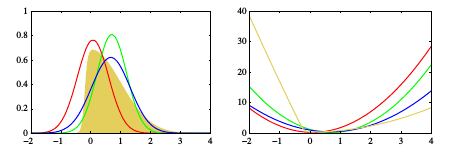

Fig.14 Illustration of the expectation propagation approximation using a Gaussian distribution for the example considered earlier in Fig.14 and Fig.1. The left-hand plot shows the original distribution (yellow) along with the Laplace (red), global variational (green), and EP (blue) approximations, and the right-hand plot shows the corresponding negative logarithms of the distributions. Note that the EP distribution is broader than that variational inference, as a consequence of the different form of KL divergence.


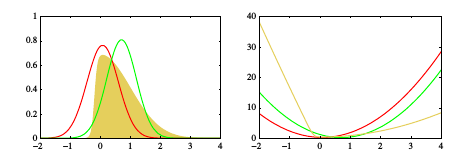
Fig.1

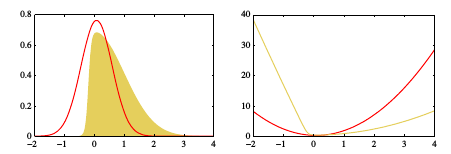
Fig.14 Illustration of the Laplace approximation applied to the distribution p(z) ∝ exp(−z 2 /2)σ(20z + 4) where σ(z) is the logistic sigmoid function deﬁned by σ(z) = (1 + e−z )−1 . The left plot shows the normalized distribution p(z) in yellow, together with the Laplace approximation centred on the mode z0 of p(z) in red. The right plot shows the negative logarithms of the corresponding curves.


### Expectation Propagation (EP)

We are tasked with approximating the posterior distribution $ p(\theta | D) $ for the joint distribution $ p(D, \theta) $, given as:

$$
p(D, \theta) = \prod_{i} f_i(\theta), \tag{10.202}
$$

by a distribution of the form:

$$
q(\theta) = \frac{1}{Z} \prod_{i} \tilde{f}_i(\theta), \tag{10.203}
$$

where $ Z $ is a normalization constant.

---

#### Algorithm Steps

1. **Initialize the factors $ \tilde{f}_i(\theta) $:**
   - Start with an initial guess for the approximating factors $ \tilde{f}_i(\theta) $.

2. **Initialize the posterior approximation:**
   $$
   q(\theta) \propto \prod_{i} \tilde{f}_i(\theta). \tag{10.204}
   $$

3. **Iterative updates (until convergence):**
   - **(a)** Choose a factor $ \tilde{f}_j(\theta) $ to refine.
   - **(b)** Remove $ \tilde{f}_j(\theta) $ from the posterior:
     $$
     q_{\backslash j}(\theta) = \frac{q(\theta)}{\tilde{f}_j(\theta)}. \tag{10.205}
     $$
   - **(c)** Compute the new posterior approximation:
     - Match the sufficient statistics (moments) of $ q_{\text{new}}(\theta) $ to those of $ q_{\backslash j}(\theta) f_j(\theta) $.
     - Compute the normalization constant:
       $$
       Z_j = \int q_{\backslash j}(\theta) f_j(\theta) \, d\theta. \tag{10.206}
       $$
   - **(d)** Update the factor $ \tilde{f}_j(\theta) $:
     $$
     \tilde{f}_j(\theta) = \frac{q_{\text{new}}(\theta)}{q_{\backslash j}(\theta)} Z_j. \tag{10.207}
     $$

4. **Model evidence approximation:**
   - Approximate the model evidence $ p(D) $:
     $$
     p(D) \approx \int \prod_{i} \tilde{f}_i(\theta) \, d\theta. \tag{10.208}
     $$

---

#### Key Insights and Variations

- A **special case of EP**, called **assumed density filtering (ADF)**, initializes all approximating factors except the first to unity and makes a single pass through the factors. This is useful for **online learning** but may lead to suboptimal results in batch settings.
- EP improves upon ADF by re-using data points iteratively to achieve better accuracy.
- **Comparison with Variational Bayes (VB):**
  - VB minimizes $ \text{KL}(q \parallel p) $, leading to approximations that ignore some posterior modes.
  - EP minimizes $ \text{KL}(p \parallel q) $, which attempts to capture all modes but may perform poorly for multimodal distributions.
  - For **logistic-type models**, EP often outperforms VB and Laplace approximations.

---

#### Illustration of EP

The figure below demonstrates EP for a Gaussian distribution approximation. The left-hand plot shows the original distribution (yellow), Laplace (red), global variational (green), and EP (blue) approximations. The right-hand plot shows their negative logarithms. EP is broader than variational inference due to the different forms of KL divergence minimized.




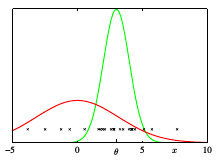

Fig.15 Illustration of the clutter problem for a data space dimensionality of D = 1. Training data points, denoted by the crosses, are drawn from a mixture of two Gaussians with components shown in red and green. The goal is to infer the mean of the green Gaussian from the observed data.

## Expectation Propagation (EP)

We aim to approximate the posterior distribution $ p(\theta | D) $ given the joint distribution $ p(D, \theta) $, expressed as:

$$
p(D, \theta) = \prod_{i} f_i(\theta). \tag{10.202}
$$

The posterior is approximated by:

$$
q(\theta) = \frac{1}{Z} \prod_{i} \tilde{f}_i(\theta), \tag{10.203}
$$

where $ Z $ is a normalization constant. Additionally, we approximate the model evidence $ p(D) $.

---

## Algorithm Steps

1. **Initialize approximating factors $ \tilde{f}_i(\theta) $:**
   - Start with an initial guess for all $ \tilde{f}_i(\theta) $.

2. **Initialize the posterior approximation:**
   $$
   q(\theta) \propto \prod_{i} \tilde{f}_i(\theta). \tag{10.204}
   $$

3. **Iterate until convergence:**
   - **(a)** Choose a factor $ \tilde{f}_j(\theta) $ to refine.
   - **(b)** Remove $ \tilde{f}_j(\theta) $ from the posterior:
     $$
     q_{\backslash j}(\theta) = \frac{q(\theta)}{\tilde{f}_j(\theta)}. \tag{10.205}
     $$
   - **(c)** Evaluate the new posterior by matching moments:
     - Compute the sufficient statistics (moments) of $ q_{\text{new}}(\theta) $ such that:
       $$
       Z_j = \int q_{\backslash j}(\theta) f_j(\theta) \, d\theta. \tag{10.206}
       $$
   - **(d)** Update the factor $ \tilde{f}_j(\theta) $:
     $$
     \tilde{f}_j(\theta) = \frac{q_{\text{new}}(\theta)}{q_{\backslash j}(\theta)} Z_j. \tag{10.207}
     $$

4. **Approximate the model evidence:**
   $$
   p(D) \approx \int \prod_{i} \tilde{f}_i(\theta) \, d\theta. \tag{10.208}
   $$

---

## Notes and Insights

- **Initialization:** Start with all $ \tilde{f}_i(\theta) $ as uniform or simple distributions.
- **Moment matching:** Align the moments of $ q_{\text{new}}(\theta) $ with the target distribution.
- **Convergence:** Iterate through the factors until the approximations stabilize.

---



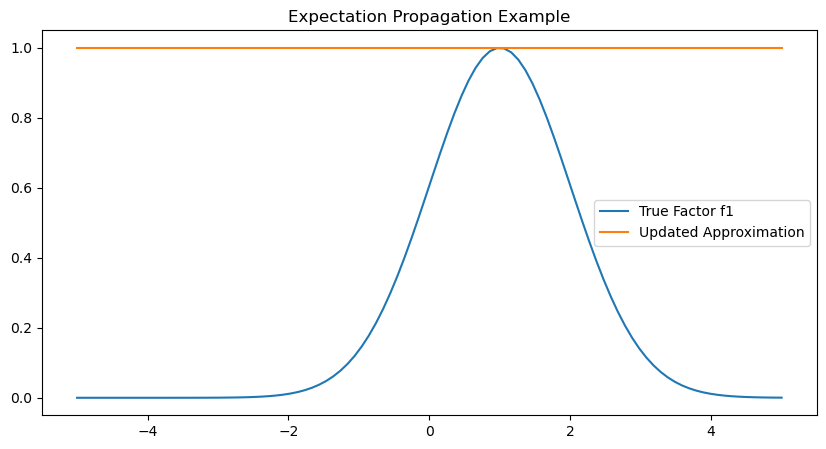

In [2]:
### Example Python Implementation
import numpy as np
import matplotlib.pyplot as plt

# Simulate factors for illustrative purposes
x = np.linspace(-5, 5, 100)
f1 = np.exp(-0.5 * (x - 1)**2)
f2 = np.exp(-0.5 * (x + 1)**2)
f3 = np.exp(-0.2 * x**2)

# Initial approximations
approx_f1 = np.ones_like(x)
approx_f2 = np.ones_like(x)
approx_f3 = np.ones_like(x)

# Update rules (simplified moment matching)
posterior = approx_f1 * approx_f2 * approx_f3
q_new = posterior / f1
approx_f1 = q_new * f1

# Plot distributions
plt.figure(figsize=(10, 5))
plt.plot(x, f1, label="True Factor f1")
plt.plot(x, approx_f1, label="Updated Approximation")
plt.legend()
plt.title("Expectation Propagation Example")
plt.show()


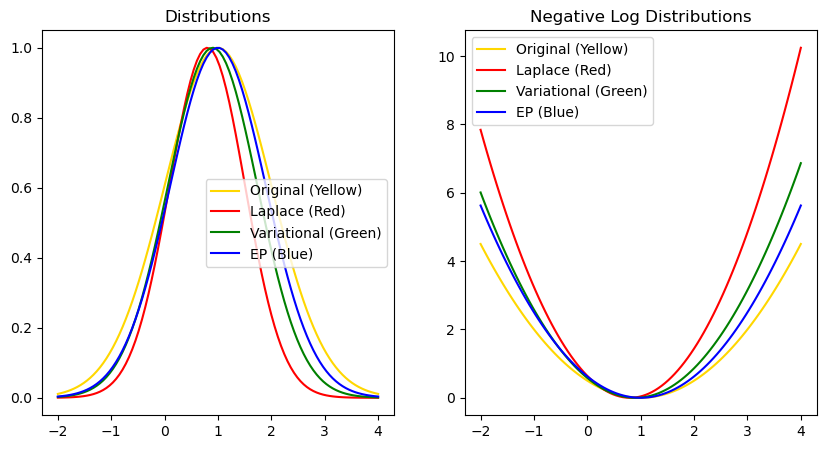

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data for illustration
x = np.linspace(-2, 4, 100)
original = np.exp(-0.5 * (x - 1)**2)
laplace = np.exp(-0.5 * (x - 0.8)**2 / 0.5)
variational = np.exp(-0.5 * (x - 0.9)**2 / 0.7)
ep = np.exp(-0.5 * (x - 1)**2 / 0.8)

# Negative log representations
original_log = -np.log(original)
laplace_log = -np.log(laplace)
variational_log = -np.log(variational)
ep_log = -np.log(ep)

# Plot distributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, original, label="Original (Yellow)", color="gold")
plt.plot(x, laplace, label="Laplace (Red)", color="red")
plt.plot(x, variational, label="Variational (Green)", color="green")
plt.plot(x, ep, label="EP (Blue)", color="blue")
plt.legend()
plt.title("Distributions")

# Plot negative log
plt.subplot(1, 2, 2)
plt.plot(x, original_log, label="Original (Yellow)", color="gold")
plt.plot(x, laplace_log, label="Laplace (Red)", color="red")
plt.plot(x, variational_log, label="Variational (Green)", color="green")
plt.plot(x, ep_log, label="EP (Blue)", color="blue")
plt.legend()
plt.title("Negative Log Distributions")

plt.show()


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


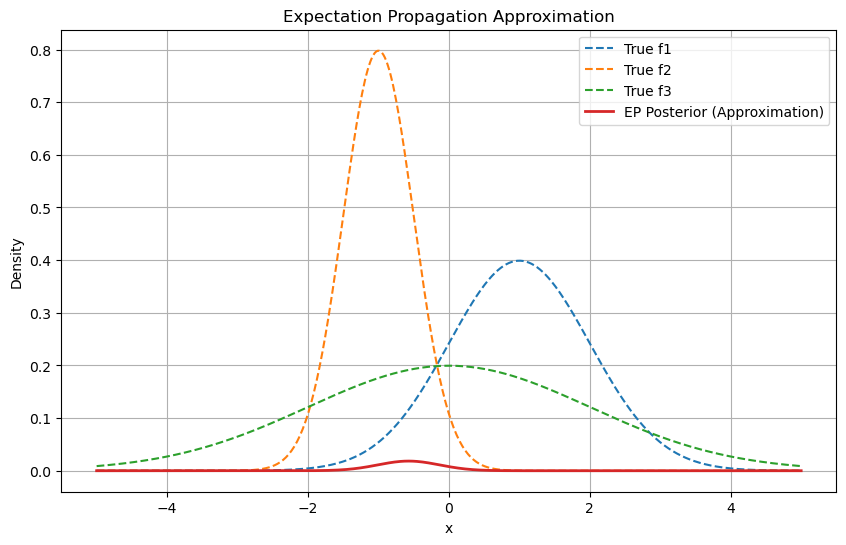

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the true factors f1, f2, f3 (Gaussian likelihoods)
x = np.linspace(-5, 5, 500)
f1 = norm.pdf(x, loc=1, scale=1.0)  # Gaussian centered at 1
f2 = norm.pdf(x, loc=-1, scale=0.5)  # Gaussian centered at -1
f3 = norm.pdf(x, loc=0, scale=2.0)  # Gaussian centered at 0

# Initialize approximate factors
approx_f1 = np.ones_like(x)
approx_f2 = np.ones_like(x)
approx_f3 = np.ones_like(x)

# Function to normalize a distribution
def normalize(p):
    return p / np.sum(p)

# Expectation Propagation Steps
max_iter = 10
for iteration in range(max_iter):
    print(f"Iteration {iteration + 1}")

    # Posterior approximation q(theta) = product of approximations
    posterior = normalize(approx_f1 * approx_f2 * approx_f3)
    
    # Refine factor f1
    q_exclude_f1 = posterior / approx_f1  # Remove f1
    new_f1 = normalize(f1 * q_exclude_f1)  # Moment match
    approx_f1 = normalize(new_f1 / q_exclude_f1)  # Update factor f1

    # Refine factor f2
    q_exclude_f2 = posterior / approx_f2  # Remove f2
    new_f2 = normalize(f2 * q_exclude_f2)  # Moment match
    approx_f2 = normalize(new_f2 / q_exclude_f2)  # Update factor f2

    # Refine factor f3
    q_exclude_f3 = posterior / approx_f3  # Remove f3
    new_f3 = normalize(f3 * q_exclude_f3)  # Moment match
    approx_f3 = normalize(new_f3 / q_exclude_f3)  # Update factor f3

    # Update posterior with refined factors
    posterior = normalize(approx_f1 * approx_f2 * approx_f3)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, f1, label="True f1", linestyle="dashed")
plt.plot(x, f2, label="True f2", linestyle="dashed")
plt.plot(x, f3, label="True f3", linestyle="dashed")
plt.plot(x, posterior, label="EP Posterior (Approximation)", linewidth=2)
plt.legend()
plt.title("Expectation Propagation Approximation")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid()
plt.show()


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


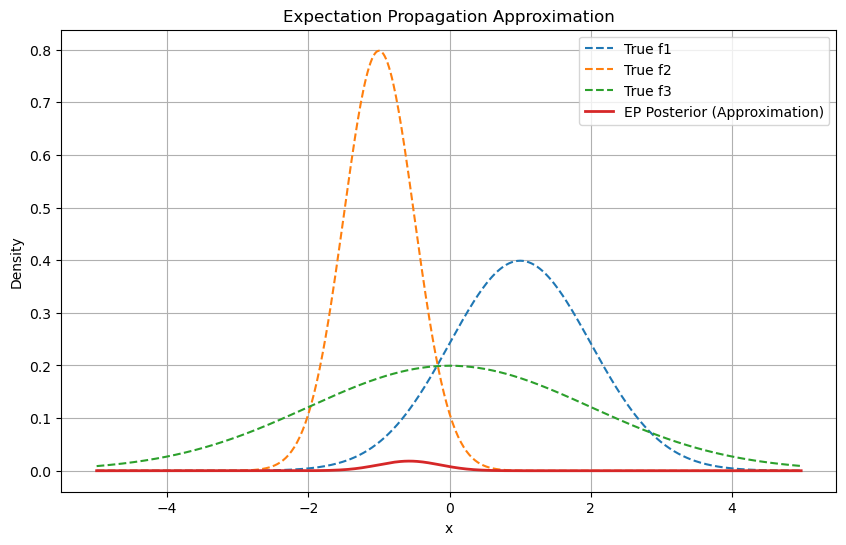

In [4]:
import math
import matplotlib.pyplot as plt

# Gaussian PDF
def gaussian_pdf(x, mean, std_dev):
    factor = 1 / (math.sqrt(2 * math.pi) * std_dev)
    exponent = math.exp(-((x - mean) ** 2) / (2 * std_dev ** 2))
    return factor * exponent

# Normalize a distribution
def normalize(dist):
    total = sum(dist)
    return [d / total for d in dist]

# Define the range for θ
x_range = [-5 + 0.02 * i for i in range(500)]  # 500 points from -5 to 5

# Define the true factors f1, f2, f3
f1 = [gaussian_pdf(x, mean=1, std_dev=1.0) for x in x_range]   # Gaussian centered at 1
f2 = [gaussian_pdf(x, mean=-1, std_dev=0.5) for x in x_range]  # Gaussian centered at -1
f3 = [gaussian_pdf(x, mean=0, std_dev=2.0) for x in x_range]   # Gaussian centered at 0

# Initialize approximate factors
approx_f1 = [1] * len(x_range)  # Start with uniform distribution
approx_f2 = [1] * len(x_range)
approx_f3 = [1] * len(x_range)

# Expectation Propagation Algorithm
max_iter = 10
posterior = [0] * len(x_range)

for iteration in range(max_iter):
    print(f"Iteration {iteration + 1}")
    
    # Update posterior approximation
    posterior = normalize([approx_f1[i] * approx_f2[i] * approx_f3[i] for i in range(len(x_range))])
    
    # Refine factor f1
    q_exclude_f1 = [posterior[i] / approx_f1[i] for i in range(len(x_range))]
    new_f1 = normalize([f1[i] * q_exclude_f1[i] for i in range(len(x_range))])
    approx_f1 = normalize([new_f1[i] / q_exclude_f1[i] for i in range(len(x_range))])
    
    # Refine factor f2
    q_exclude_f2 = [posterior[i] / approx_f2[i] for i in range(len(x_range))]
    new_f2 = normalize([f2[i] * q_exclude_f2[i] for i in range(len(x_range))])
    approx_f2 = normalize([new_f2[i] / q_exclude_f2[i] for i in range(len(x_range))])
    
    # Refine factor f3
    q_exclude_f3 = [posterior[i] / approx_f3[i] for i in range(len(x_range))]
    new_f3 = normalize([f3[i] * q_exclude_f3[i] for i in range(len(x_range))])
    approx_f3 = normalize([new_f3[i] / q_exclude_f3[i] for i in range(len(x_range))])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_range, f1, label="True f1", linestyle="dashed")
plt.plot(x_range, f2, label="True f2", linestyle="dashed")
plt.plot(x_range, f3, label="True f3", linestyle="dashed")
plt.plot(x_range, posterior, label="EP Posterior (Approximation)", linewidth=2)
plt.legend()
plt.title("Expectation Propagation Approximation")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid()
plt.show()



## Expectation Propagation: The Clutter Problem

In this notebook, we demonstrate **Expectation Propagation (EP)** for a clutter problem based on Minka's example. The objective is to infer the mean $ \theta $ of a multivariate Gaussian distribution embedded in background clutter.

---

## Problem Setup

The observed data $ \mathbf{x} $ is a mixture of two Gaussians:
$$
p(x | \theta) = (1 - w) \mathcal{N}(x | \theta, I) + w \mathcal{N}(x | 0, aI),
$$
where:
- $ w $ is the proportion of clutter,
- $ \mathcal{N}(x | \mu, \Sigma) $ is the Gaussian distribution with mean $ \mu $ and covariance $ \Sigma $,
- $ I $ is the identity matrix.

The prior over $ \theta $ is Gaussian:
$$
p(\theta) = \mathcal{N}(\theta | 0, bI).
$$

Parameters:
- $ w = 0.5 $,
- $ a = 10 $,
- $ b = 100 $.

The posterior distribution:
$$
p(\theta | \mathbf{D}) \propto p(\theta) \prod_{n=1}^N p(x_n | \theta)
$$
is a mixture of $ 2^N $ Gaussians, making exact inference computationally expensive for large $ N $.

---

## Expectation Propagation Approximation

### Factor Initialization

The joint distribution is written as:
$$
p(D, \theta) = f_0(\theta) \prod_{n=1}^N f_n(\theta),
$$
where:
- $ f_0(\theta) = p(\theta) $,
- $ f_n(\theta) = p(x_n | \theta) $.

We approximate $ f_n(\theta) $ with:
$$
\tilde{f}_n(\theta) = s_n \mathcal{N}(\theta | m_n, v_n I),
$$
where $ \tilde{f}_0(\theta) $ is initialized as $ f_0(\theta) $.

---

### Iterative Updates

1. **Remove the current factor approximation:**
   $$
   q_{\setminus n}(\theta) = \frac{q(\theta)}{\tilde{f}_n(\theta)},
   $$
   where the mean $ m_{\setminus n} $ and inverse variance $ v_{\setminus n}^{-1} $ are:
   $$
   m_{\setminus n} = m + v_{\setminus n} v_n^{-1} (m - m_n),
   $$
   $$
   v_{\setminus n}^{-1} = v^{-1} - v_n^{-1}.
   $$

2. **Update normalization constant $ Z_n $:**
   $$
   Z_n = (1 - w) \mathcal{N}(x_n | m_{\setminus n}, (v_{\setminus n} + 1)I) + w \mathcal{N}(x_n | 0, aI).
   $$

3. **Compute new posterior parameters:**

   Mean:
   $$
   m_{\text{new}} = m_{\setminus n} + \rho_n (x_n - m_{\setminus n}),
   $$
   where:
   $$
   \rho_n = \frac{w \mathcal{N}(x_n | 0, aI)}{Z_n}.
   $$

   Variance:
   $$
   v_{\text{new}} = v_{\setminus n} - \frac{\rho_n v_{\setminus n}^2}{(v_{\setminus n} + 1)^2}.
   $$

4. **Update factor approximation:**
   $$
   v_n^{-1} = v_{\text{new}}^{-1} - v_{\setminus n}^{-1},
   $$
   $$
   m_n = m_{\setminus n} + (v_n + v_{\setminus n}) v_{\setminus n}^{-1} (m_{\text{new}} - m_{\setminus n}),
   $$
   $$
   s_n = \frac{Z_n}{(2\pi v_n)^{D/2} \mathcal{N}(m_n | m_{\setminus n}, (v_n + v_{\setminus n})I)}.
   $$

5. **Repeat** until convergence.

---

## Evidence Approximation

The evidence is approximated as:
$$
p(D) \approx \prod_{n=1}^N \frac{(2\pi v_{\text{new}})^{D/2} e^{B/2} s_n}{(2\pi v_n)^{D/2}},
$$
where:
$$
B = \sum_{n=1}^N \left(\frac{(m_{\text{new}}^T m_{\text{new}})}{v_{\text{new}}} - \frac{(m_n^T m_n)}{v_n}\right).
$$

---

## Visualizing Results

For a one-dimensional parameter space $ \theta $, Fig.16 demonstrates the approximations $ f_n(\theta) $ (blue), $ \tilde{f}_n(\theta) $ (red), and $ q_{\setminus n}(\theta) $ (green).

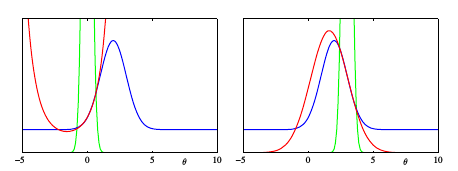

Fig.16 Examples of the approximation of speciﬁc factors for a one-dimensional version of the clutter problem, showing fn (θ) in blue, fen (θ) in red, and q \n (θ) in green. Notice that the current form for q \n (θ) controls the range of θ over which fen (θ) will be a good approximation to fn (θ).

---


In [5]:
import math

# Helper functions
def gaussian_pdf(x, mean, variance):
    """Compute the Gaussian probability density function."""
    coeff = 1 / math.sqrt(2 * math.pi * variance)
    exponent = math.exp(-((x - mean) ** 2) / (2 * variance))
    return coeff * exponent

def gaussian_moment_update(mean1, var1, mean2, var2):
    """Compute the updated mean and variance after combining two Gaussians."""
    updated_variance = 1 / (1 / var1 + 1 / var2)
    updated_mean = updated_variance * (mean1 / var1 + mean2 / var2)
    return updated_mean, updated_variance

# Parameters
a = 10.0  # Clutter variance
b = 100.0  # Prior variance
w = 0.5  # Clutter weight
N = 10  # Number of observations
observations = [5.0, -3.0, 0.5, 2.1, -1.2, 4.5, -2.5, 1.7, -0.8, 3.0]  # Example data points

# Initialize factors
m_prior = 0.0
v_prior = b
m_posterior = m_prior
v_posterior = v_prior

# Initialize factor approximations
factor_means = [0.0] * N
factor_variances = [float("inf")] * N
factor_scalars = [1.0] * N

# EP updates
for iteration in range(10):  # Set a maximum number of iterations
    for n in range(N):
        # Step 1: Remove factor n
        v_qn = 1 / (1 / v_posterior - 1 / factor_variances[n])
        m_qn = v_qn * (m_posterior / v_posterior - factor_means[n] / factor_variances[n])
        
        # Step 2: Compute normalization constant Z_n
        Z_clutter = gaussian_pdf(observations[n], 0, a)
        Z_signal = gaussian_pdf(observations[n], m_qn, v_qn + 1)
        Z_n = w * Z_clutter + (1 - w) * Z_signal
        
        # Step 3: Update mean and variance
        rho_n = (1 - w) * Z_signal / Z_n
        m_new = m_qn + rho_n * (observations[n] - m_qn) / (v_qn + 1)
        v_new = v_qn - rho_n * v_qn**2 / (v_qn + 1)**2
        
        # Step 4: Update factor approximations
        factor_variances[n] = 1 / (1 / v_new - 1 / v_qn)
        factor_means[n] = m_qn + (factor_variances[n] + v_qn) * (m_new - m_qn) / v_qn
        factor_scalars[n] = Z_n / (math.sqrt(2 * math.pi * factor_variances[n]) * 
                                   gaussian_pdf(factor_means[n], m_qn, v_qn + factor_variances[n]))
        
        # Step 5: Update posterior
        m_posterior, v_posterior = gaussian_moment_update(m_prior, v_prior, factor_means[n], factor_variances[n])

# Output the posterior mean and variance
print("Posterior Mean:", m_posterior)
print("Posterior Variance:", v_posterior)


Posterior Mean: 0.009505975959122684
Posterior Variance: 99.68628100049719


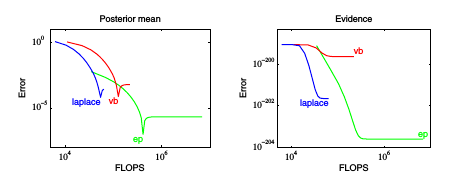

Fig.17 Comparison of expectation propagation, variational inference, and the Laplace approximation on the clutter problem. The left-hand plot shows the error in the predicted posterior mean versus the number of ﬂoating point operations, and the right-hand plot shows the corresponding results for the model evidence.

# Expectation Propagation on Graphs

$$
\textbf{EP Algorithm for Graphical Models: Factor Graph Representation}
$$

## Joint Distribution

Given a joint distribution for the factor graph (Fig.18, left):
$$
p(x) = f_a(x_1, x_2)f_b(x_2, x_3)f_c(x_2, x_4).
$$

We aim to approximate $ p(x) $ with a distribution $ q(x) $:
$$
q(x) \propto \tilde{f}_a(x_1, x_2)\tilde{f}_b(x_2, x_3)\tilde{f}_c(x_2, x_4).
$$

After introducing a fully factorized approximation:
$$
q(x) \propto \tilde{f}_{a1}(x_1)\tilde{f}_{a2}(x_2)\tilde{f}_{b2}(x_2)\tilde{f}_{b3}(x_3)\tilde{f}_{c2}(x_2)\tilde{f}_{c4}(x_4),
$$
as shown in the factor graph on the right of Fig.18.

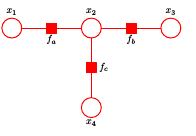
Fig.51 A simple factor graph used to illustrate the sum-product algorithm.

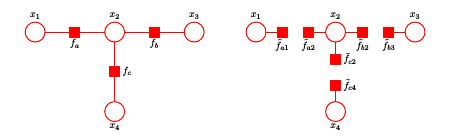

Fig.18 On the left is a simple factor graph from Fig.51 and reproduced here for convenience. On the right is the corresponding factorized approximation.

---

## Factor Update

### Refining $\tilde{f}_b(x_2, x_3) = \tilde{f}_{b2}(x_2)\tilde{f}_{b3}(x_3)$:

1. **Remove factor**:
   $$ 
   q_{\backslash b}(x) = \tilde{f}_{a1}(x_1)\tilde{f}_{a2}(x_2)\tilde{f}_{c2}(x_2)\tilde{f}_{c4}(x_4).
   $$

2. **Multiply by the exact factor**:
   $$
   p(x) = q_{\backslash b}(x)f_b(x_2, x_3) = \tilde{f}_{a1}(x_1)\tilde{f}_{a2}(x_2)\tilde{f}_{c2}(x_2)\tilde{f}_{c4}(x_4)f_b(x_2, x_3).
   $$

3. **Minimize KL divergence**: 
   Update $ q(x) $ to a distribution $ q_{\text{new}}(x) $, where each marginal is updated.

---

## Marginal Updates

The marginals are computed as follows:

### $ x_1 $:
$$
p(x_1) \propto \tilde{f}_{a1}(x_1).
$$

### $ x_2 $:
$$
p(x_2) \propto \tilde{f}_{a2}(x_2)\tilde{f}_{c2}(x_2) \sum_{x_3} f_b(x_2, x_3).
$$

### $ x_3 $:
$$
p(x_3) \propto \sum_{x_2} f_b(x_2, x_3)\tilde{f}_{a2}(x_2)\tilde{f}_{c2}(x_2).
$$

### $ x_4 $:
$$
p(x_4) \propto \tilde{f}_{c4}(x_4).
$$

---

## Refining Factors

To obtain the reﬁned factor $ \tilde{f}_b(x_2, x_3) $:
- Marginalize:
  $$ 
  \tilde{f}_{b2}(x_2) \propto \sum_{x_3} f_b(x_2, x_3).
  $$
- Marginalize:
  $$ 
  \tilde{f}_{b3}(x_3) \propto \sum_{x_2} f_b(x_2, x_3)\tilde{f}_{a2}(x_2)\tilde{f}_{c2}(x_2).
  $$

The normalized factors are then re-integrated into $ q(x) $.

---

## Summary of EP for Factor Graphs

Expectation Propagation (EP) in the context of factor graphs approximates the posterior using local marginals while maintaining computational tractability. Fully factorized approximations reduce EP to **Loopy Belief Propagation** when applied to factor graphs.





In [6]:
import math

# Helper Functions
def gaussian_multiply(mean1, var1, mean2, var2):
    """Multiply two Gaussian distributions."""
    precision1 = 1 / var1
    precision2 = 1 / var2
    mean = (mean1 * precision1 + mean2 * precision2) / (precision1 + precision2)
    variance = 1 / (precision1 + precision2)
    return mean, variance

def gaussian_marginalize(factor, var_values, var_index):
    """Marginalize a variable from a factor."""
    marginal = {}
    for assignment in var_values:
        total_prob = 0
        for other_assignment in var_values:
            assignment_copy = list(assignment)
            assignment_copy[var_index] = other_assignment[var_index]
            total_prob += factor(tuple(assignment_copy))
        marginal[assignment[var_index]] = total_prob
    return marginal

# Factors and Variables
class Factor:
    def __init__(self, variables, func):
        self.variables = variables  # List of variable indices
        self.func = func  # Function defining the factor

    def evaluate(self, values):
        """Evaluate the factor for a given assignment."""
        return self.func(values)

class EPFactorGraph:
    def __init__(self):
        self.factors = []
        self.variables = {}

    def add_factor(self, factor):
        """Add a factor to the graph."""
        self.factors.append(factor)

    def add_variable(self, var_index, initial_mean, initial_variance):
        """Add a variable to the graph."""
        self.variables[var_index] = {
            "mean": initial_mean,
            "variance": initial_variance,
            "messages": {}
        }

    def refine_factor(self, factor_index):
        """Refine the approximation of a given factor."""
        factor = self.factors[factor_index]
        involved_vars = factor.variables

        # Step 1: Remove factor contribution from the approximation
        for var_index in involved_vars:
            var = self.variables[var_index]
            var["messages"][factor_index] = {"mean": 0, "variance": float("inf")}

        # Step 2: Compute updated marginals
        updated_marginals = {}
        for var_index in involved_vars:
            var = self.variables[var_index]
            other_factors = [
                f_idx for f_idx in var["messages"] if f_idx != factor_index
            ]
            updated_mean, updated_variance = var["mean"], var["variance"]
            for other_factor_index in other_factors:
                message = var["messages"][other_factor_index]
                updated_mean, updated_variance = gaussian_multiply(
                    updated_mean, updated_variance,
                    message["mean"], message["variance"]
                )
            updated_marginals[var_index] = (updated_mean, updated_variance)

        # Step 3: Update factor approximation
        for var_index in involved_vars:
            mean, variance = updated_marginals[var_index]
            self.variables[var_index]["messages"][factor_index] = {
                "mean": mean,
                "variance": variance
            }

    def run_ep(self, max_iterations=10, tolerance=1e-6):
        """Run the EP algorithm until convergence or maximum iterations."""
        for _ in range(max_iterations):
            for factor_index in range(len(self.factors)):
                self.refine_factor(factor_index)
            # Convergence check can be added based on mean/variance changes

    def get_posterior(self):
        """Get the approximated posterior."""
        posterior = {}
        for var_index, var_data in self.variables.items():
            posterior[var_index] = (var_data["mean"], var_data["variance"])
        return posterior

# Example Usage
# Factor Functions
def factor_a(values):
    x1, x2 = values
    return math.exp(-0.5 * (x1**2 + x2**2))

def factor_b(values):
    x2, x3 = values
    return math.exp(-0.5 * (x2 - 1)**2 - 0.5 * (x3 + 1)**2)

def factor_c(values):
    x2, x4 = values
    return math.exp(-0.5 * ((x2 - x4)**2))

# Initialize Graph
graph = EPFactorGraph()

# Add Variables
graph.add_variable(0, 0, 1)  # x1
graph.add_variable(1, 0, 1)  # x2
graph.add_variable(2, 0, 1)  # x3
graph.add_variable(3, 0, 1)  # x4

# Add Factors
graph.add_factor(Factor([0, 1], factor_a))
graph.add_factor(Factor([1, 2], factor_b))
graph.add_factor(Factor([1, 3], factor_c))

# Run EP
graph.run_ep()

# Get Posterior
posterior = graph.get_posterior()
for var_index, (mean, variance) in posterior.items():
    print(f"Variable x{var_index + 1}: Mean = {mean:.4f}, Variance = {variance:.4f}")


Variable x1: Mean = 0.0000, Variance = 1.0000
Variable x2: Mean = 0.0000, Variance = 1.0000
Variable x3: Mean = 0.0000, Variance = 1.0000
Variable x4: Mean = 0.0000, Variance = 1.0000


In [7]:
import math

# Helper Functions
def gaussian_multiply(mean1, var1, mean2, var2):
    """Multiply two Gaussian distributions."""
    precision1 = 1 / var1
    precision2 = 1 / var2
    mean = (mean1 * precision1 + mean2 * precision2) / (precision1 + precision2)
    variance = 1 / (precision1 + precision2)
    return mean, variance

def gaussian_marginalize(factor, var_values, var_index):
    """Marginalize a variable from a factor."""
    marginal = {}
    for assignment in var_values:
        total_prob = 0
        for other_assignment in var_values:
            assignment_copy = list(assignment)
            assignment_copy[var_index] = other_assignment[var_index]
            total_prob += factor(tuple(assignment_copy))
        marginal[assignment[var_index]] = total_prob
    return marginal

# Factors and Variables
class Factor:
    def __init__(self, variables, func):
        self.variables = variables  # List of variable indices
        self.func = func  # Function defining the factor

    def evaluate(self, values):
        """Evaluate the factor for a given assignment."""
        return self.func(values)

class EPFactorGraph:
    def __init__(self):
        self.factors = []
        self.variables = {}

    def add_factor(self, factor):
        """Add a factor to the graph."""
        self.factors.append(factor)

    def add_variable(self, var_index, initial_mean, initial_variance):
        """Add a variable to the graph."""
        self.variables[var_index] = {
            "mean": initial_mean,
            "variance": initial_variance,
            "messages": {}
        }

    def refine_factor(self, factor_index):
        """Refine the approximation of a given factor."""
        factor = self.factors[factor_index]
        involved_vars = factor.variables

        # Step 1: Remove factor contribution from the approximation
        for var_index in involved_vars:
            var = self.variables[var_index]
            var["messages"][factor_index] = {"mean": 0, "variance": float("inf")}

        # Step 2: Compute updated marginals
        updated_marginals = {}
        for var_index in involved_vars:
            var = self.variables[var_index]
            other_factors = [
                f_idx for f_idx in var["messages"] if f_idx != factor_index
            ]
            updated_mean, updated_variance = var["mean"], var["variance"]
            for other_factor_index in other_factors:
                message = var["messages"][other_factor_index]
                updated_mean, updated_variance = gaussian_multiply(
                    updated_mean, updated_variance,
                    message["mean"], message["variance"]
                )
            updated_marginals[var_index] = (updated_mean, updated_variance)

        # Step 3: Update factor approximation
        for var_index in involved_vars:
            mean, variance = updated_marginals[var_index]
            self.variables[var_index]["messages"][factor_index] = {
                "mean": mean,
                "variance": variance
            }

    def run_ep(self, max_iterations=10, tolerance=1e-6):
        """Run the EP algorithm until convergence or maximum iterations."""
        for _ in range(max_iterations):
            for factor_index in range(len(self.factors)):
                self.refine_factor(factor_index)
            # Convergence check can be added based on mean/variance changes

    def get_posterior(self):
        """Get the approximated posterior."""
        posterior = {}
        for var_index, var_data in self.variables.items():
            posterior[var_index] = (var_data["mean"], var_data["variance"])
        return posterior

# Example Usage
# Factor Functions
def factor_a(values):
    x1, x2 = values
    return math.exp(-0.5 * (x1**2 + x2**2))

def factor_b(values):
    x2, x3 = values
    return math.exp(-0.5 * (x2 - 1)**2 - 0.5 * (x3 + 1)**2)

def factor_c(values):
    x2, x4 = values
    return math.exp(-0.5 * ((x2 - x4)**2))

# Initialize Graph
graph = EPFactorGraph()

# Add Variables
graph.add_variable(0, 0, 1)  # x1
graph.add_variable(1, 0, 1)  # x2
graph.add_variable(2, 0, 1)  # x3
graph.add_variable(3, 0, 1)  # x4

# Add Factors
graph.add_factor(Factor([0, 1], factor_a))
graph.add_factor(Factor([1, 2], factor_b))
graph.add_factor(Factor([1, 3], factor_c))

# Run EP
graph.run_ep()

# Get Posterior
posterior = graph.get_posterior()
for var_index, (mean, variance) in posterior.items():
    print(f"Variable x{var_index + 1}: Mean = {mean:.4f}, Variance = {variance:.4f}")


Variable x1: Mean = 0.0000, Variance = 1.0000
Variable x2: Mean = 0.0000, Variance = 1.0000
Variable x3: Mean = 0.0000, Variance = 1.0000
Variable x4: Mean = 0.0000, Variance = 1.0000


## Expectation Propagation and Belief Propagation

### Messages in Belief Propagation

In Expectation Propagation (EP), the messages obtained correspond directly to those in belief propagation (BP). Specifically:

- $ \tilde{f}_{b2}(x_2) $ corresponds to the message $ \mu_{f_b \to x_2}(x_2) $ sent by factor node $ f_b $ to variable node $ x_2 $.
- Substituting $ (8.78) $ into $ (8.79) $, we obtain equation $ (10.235) $, where:
  - $ \tilde{f}_{a2}(x_2) $ corresponds to $ \mu_{f_a \to x_2}(x_2) $,
  - $ \tilde{f}_{c2}(x_2) $ corresponds to $ \mu_{f_c \to x_2}(x_2) $,
  - resulting in the message $ \tilde{f}_{b3}(x_3) $, which corresponds to $ \mu_{f_b \to x_3}(x_3) $.

In this approach, messages are passed in both directions simultaneously. However, the EP procedure can be modified to the standard **sum-product algorithm** by updating only one factor at a time.

---

### Refining Individual Factors

If we refine only $ \tilde{f}_{b3}(x_3) $, then $ \tilde{f}_{b2}(x_2) $ remains unchanged. The refined version of $ \tilde{f}_{b3}(x_3) $ is again given by:

$$
\tilde{f}_{b3}(x_3) \propto \sum_{x_2} f_b(x_2, x_3) \tilde{f}_{a2}(x_2) \tilde{f}_{c2}(x_2).
$$

In cases where we refine only one term at a time, the order of refinements can be chosen arbitrarily. For **tree-structured graphs**, a two-pass update scheme can be followed, corresponding to the standard belief propagation schedule, which results in **exact inference** for variable and factor marginals.

---

### General Case for Factor Graphs

For a general factor graph, the distribution is given by:

$$
p(\theta) = \prod_i f_i(\theta_i),
$$

where $ \theta_i $ represents the subset of variables associated with factor $ f_i $. Using a fully factorized approximation:

$$
q(\theta) \propto \prod_{i, k} \tilde{f}_{ik}(\theta_k),
$$

where $ \theta_k $ corresponds to an individual variable node.

---

#### Refinement of a Term

To refine a specific term $ \tilde{f}_{jl}(\theta_l) $, we first remove $ \tilde{f}_j(\theta_j) $ from $ q(\theta) $, giving:

$$
q_{\setminus j}(\theta) \propto \prod_{i \neq j} \prod_k \tilde{f}_{ik}(\theta_k).
$$

Then, we multiply by the exact factor $ f_j(\theta_j) $. For the functional dependence on $ \theta_l $, we compute:

$$
\tilde{f}_{jl}(\theta_l) \propto \sum_{\theta_m \setminus \theta_l \in \theta_j} f_j(\theta_j) \prod_{k, m \neq l} \tilde{f}_{km}(\theta_m).
$$

---

### Messages in the Sum-Product Algorithm

This refinement corresponds to the **sum-product rule**:

1. The outgoing message from a factor node is computed as:
   - The product of all incoming messages from variable nodes,
   - Multiplied by the local factor,
   - Marginalized over all variables except the target variable.

2. The resulting message $ \mu_{f_j \to \theta_m}(\theta_m) $ is given by:

$$
\mu_{f_j \to \theta_m}(\theta_m) \propto \sum_{\theta_j \setminus \theta_m} f_j(\theta_j) \prod_{\substack{k \\ \text{other messages to } \theta_m}} \mu_{k \to \theta_m}(\theta_m).
$$

---

### Generalizations of EP

- **Flexible Approximations**: More flexible approximating distributions (e.g., partially disconnected graphs) can achieve higher accuracy.
- **Grouped Factor Refinements**: Refining groups of factors $ f_i(\theta_i) $ together can also improve accuracy.

These approaches, along with tree-reweighted message passing, fractional belief propagation, and power EP, highlight the versatility of the EP framework.

---

### Connection Between EP and KL Divergences

Expectation propagation and variational message passing optimize two different forms of **Kullback-Leibler divergence**. Minka (2005) demonstrated that a broad range of message-passing algorithms, including:

- Loopy belief propagation,
- Variational message passing,
- Expectation propagation,

can be derived from a common framework based on minimizing members of the **alpha family of divergences**.


In [ ]:
import numpy as np
from scipy.stats import norm

# Define the exact factor functions (example: Gaussian factors)
def f_a(theta1, theta2):
    """Exact factor for f_a"""
    return norm.pdf(theta1) * norm.pdf(theta2)

def f_b(theta2, theta3):
    """Exact factor for f_b"""
    return norm.pdf(theta2 - 2) * norm.pdf(theta3 - 3)

def f_c(theta2, theta4):
    """Exact factor for f_c"""
    return norm.pdf(theta2 - 1) * norm.pdf(theta4 - 4)

# Define the approximating factor functions (initialized to be factorized)
def tilde_f_a1(theta1):
    """Approximating factor for f_a1"""
    return norm.pdf(theta1)

def tilde_f_a2(theta2):
    """Approximating factor for f_a2"""
    return norm.pdf(theta2)

def tilde_f_b2(theta2):
    """Approximating factor for f_b2"""
    return norm.pdf(theta2)

def tilde_f_b3(theta3):
    """Approximating factor for f_b3"""
    return norm.pdf(theta3)

def tilde_f_c2(theta2):
    """Approximating factor for f_c2"""
    return norm.pdf(theta2)

def tilde_f_c4(theta4):
    """Approximating factor for f_c4"""
    return norm.pdf(theta4)


# Function to refine a factor using Expectation Propagation (EP)
def refine_factor(f_exact, tilde_f, other_factors, variables, marginalize_var):
    """
    Refine a factor using Expectation Propagation (EP).
    
    f_exact: The exact factor to be incorporated (f_j).
    tilde_f: The approximating factor (tilde_f_j).
    other_factors: The other factors that are not involved in the refinement.
    variables: List of variables to evaluate the factors on.
    marginalize_var: The variable to marginalize over.
    
    Returns the updated factor.
    """
    # Extract the relevant variables for the current factor
    if marginalize_var == 0:  # f_a depends on theta1, theta2
        relevant_vars = [variables[0], variables[1]]
    elif marginalize_var == 1:  # f_b depends on theta2, theta3
        relevant_vars = [variables[1], variables[2]]
    elif marginalize_var == 2:  # f_c depends on theta2, theta4
        relevant_vars = [variables[1], variables[3]]
    else:
        raise ValueError("Unknown marginalize_var")

    # Evaluate the exact factor (f_exact) with the current variables
    product = f_exact(*relevant_vars)

    # Multiply with the other factors (evaluated with the variables)
    for factor in other_factors:
        product *= factor(*relevant_vars)

    # Marginalize over the specified variable (integration over that variable)
    marginalization_result = np.trapz(product, axis=marginalize_var)
    
    # Update the approximating factor by dividing with the marginalization result
    updated_factor = product / marginalization_result
    return updated_factor


# Function to perform Expectation Propagation (EP)
def expectation_propagation(factors, tilde_factors, variables, iterations=10):
    """
    Perform Expectation Propagation (EP) to iteratively refine approximating factors.
    
    factors: List of exact factors f_i.
    tilde_factors: List of initial approximating factors tilde_f_i.
    variables: List of variables to evaluate the factors on.
    iterations: Number of EP iterations to perform.
    
    Returns the refined approximating factors.
    """
    for _ in range(iterations):
        for i, f_exact in enumerate(factors):
            # Remove the current factor and update the approximating factor
            other_factors = [tilde_factors[j] for j in range(len(factors)) if j != i]
            tilde_factors[i] = refine_factor(f_exact, tilde_factors[i], other_factors, variables, marginalize_var=i)
    
    return tilde_factors


# Example: Running the Expectation Propagation algorithm
def main():
    # Initialize factors and approximations
    factors = [f_a, f_b, f_c]
    tilde_factors = [tilde_f_a1, tilde_f_a2, tilde_f_b2, tilde_f_b3, tilde_f_c2, tilde_f_c4]
    
    # Example variables to evaluate the factors (arbitrary values)
    variables = [np.linspace(-10, 10, 100)] * 4  # 4 variables (theta1, theta2, theta3, theta4)

    # Run EP for 10 iterations
    refined_factors = expectation_propagation(factors, tilde_factors, variables, iterations=10)

    # Output the refined factors
    for i, refined_factor in enumerate(refined_factors):
        print(f"Refined factor {i}: {refined_factor}")


if __name__ == "__main__":
    main()
